# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/valkeeranan/Desktop/matplotlib-challenge/data/Mouse_metadata.csv"
study_results_path = "/Users/valkeeranan/Desktop/matplotlib-challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.
num_mice = data_df['Mouse ID'].nunique()
print(num_mice)

249


In [31]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = data_df[data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
print(duplicate_mice_id)

['g989']


In [32]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'] !='g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = clean_df['Mouse ID'].nunique()
print(num_mice_cleaned)

248


## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

grouped_df = clean_df.groupby('Drug Regimen')
mean_tumor_volume = grouped_df['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_df['Tumor Volume (mm3)'].median()
var_tumor_volume = grouped_df['Tumor Volume (mm3)'].var()
std_tumor_volume = grouped_df['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': var_tumor_volume,
    'Tumor Volume Std. Dev.': std_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

#Print Summary
summary_stats_df.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_df.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

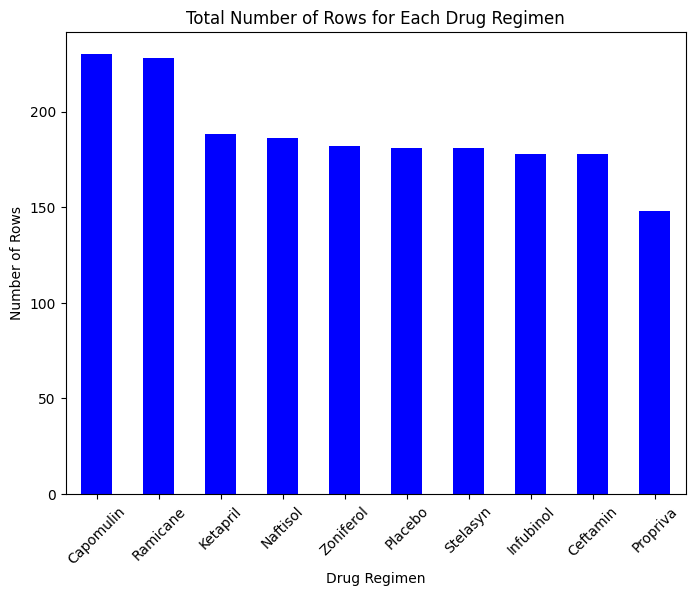

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='blue', figsize=(8, 6), rot=45)

# Title and Labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show the bar plot
plt.show()


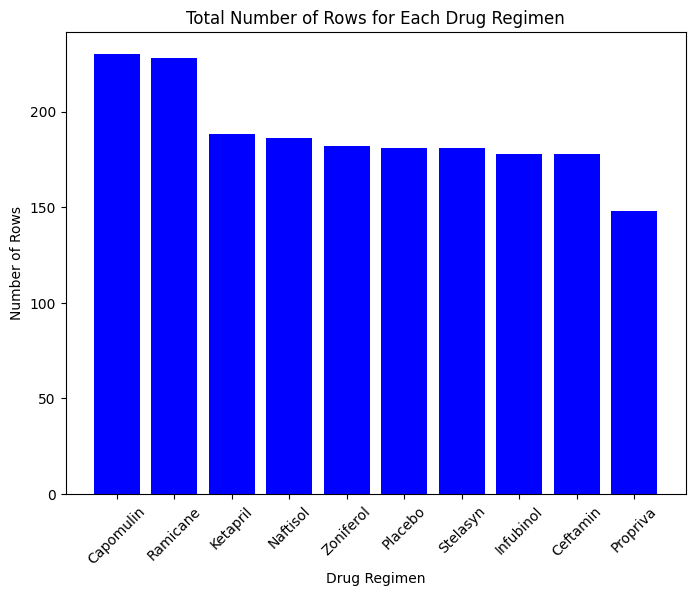

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(regimen_counts.index, regimen_counts.values, color='blue')
plt.xticks(rotation=45)

# Title and Labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show the bar plot
plt.show()

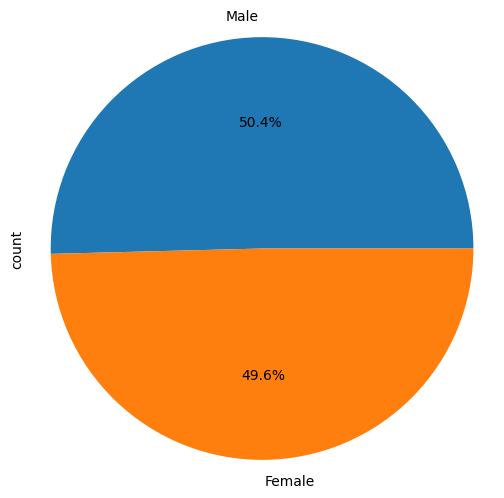

In [76]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_dist = mouse_metadata[mouse_metadata['Mouse ID'].isin(clean_df['Mouse ID'].unique())]
gender_dist = gender_dist['Sex'].value_counts()

# Make the pie chart
gender_dist.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.axis('equal')
plt.show()

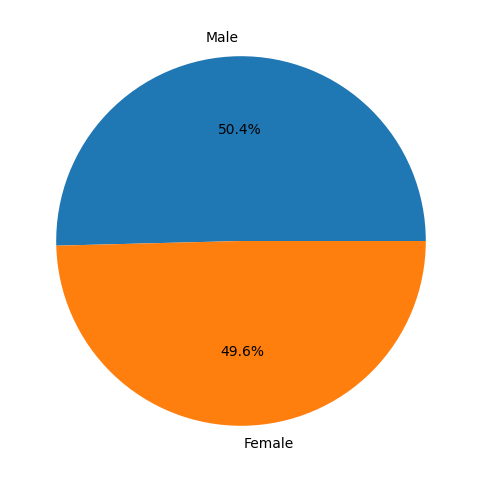

In [77]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_dist = mouse_metadata[mouse_metadata['Mouse ID'].isin(clean_df['Mouse ID'].unique())]
gender_dist = gender_dist['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(6, 6)) 
plt.pie(gender_dist.values, labels=gender_dist.index.values, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(data_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'])

# Filter the DataFrame to include only the specified treatment regimens
final_tumor_vol_df = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

#Print the DataFrame
final_tumor_vol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Add subset
    tumor_vol_data.append(tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    # Print the results
    print(f"Potential outliers for {treatment}: {outliers.tolist()}")


Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []


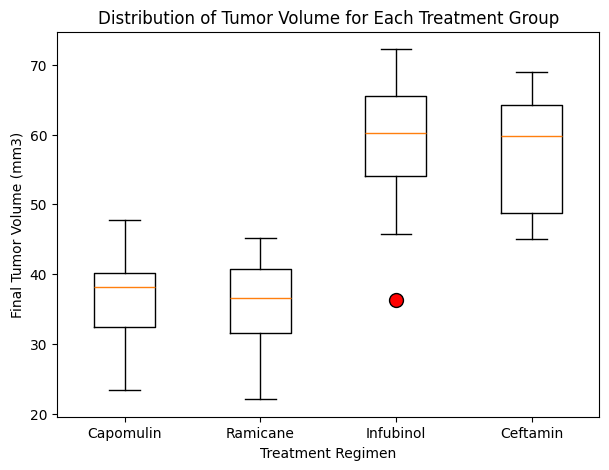

In [91]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(7, 5))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'markersize':10, 'markerfacecolor':'red'})
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

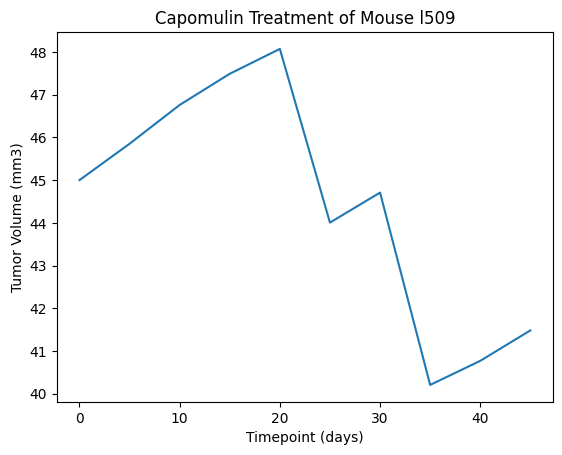

In [96]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
filtered_df = clean_df[(clean_df['Mouse ID'] == 'l509') & (clean_df['Drug Regimen'] == 'Capomulin')]

plt.plot(filtered_df['Timepoint'], filtered_df['Tumor Volume (mm3)']) 
plt.title('Capomulin Treatment of Mouse l509') 
plt.xlabel('Timepoint (days)') 
plt.ylabel('Tumor Volume (mm3)') 
plt.show()

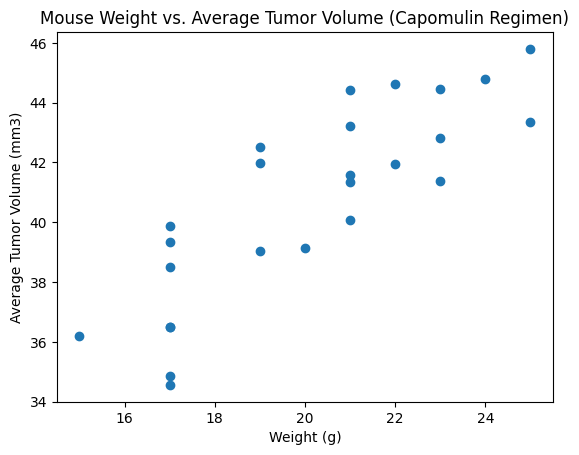

In [97]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Merge the average tumor volume data with the mouse metadata to get the weight
merged_avg_df = pd.merge(avg_tumor_vol, mouse_metadata, on="Mouse ID")

# Generate a scatter plot
plt.scatter(merged_avg_df["Weight (g)"], merged_avg_df["Tumor Volume (mm3)"])

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


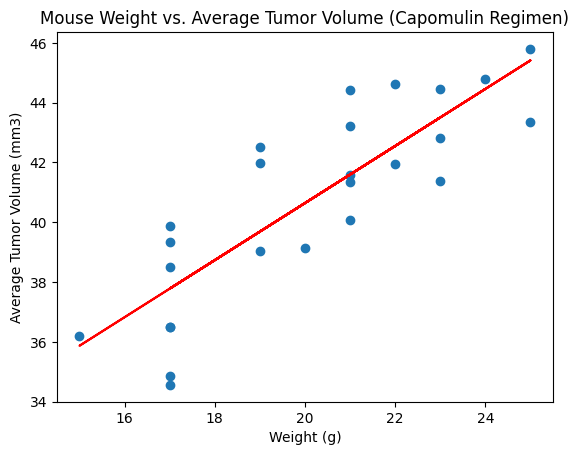

In [100]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
from scipy.stats import linregress
correlation_coef = linregress(merged_avg_df["Weight (g)"], merged_avg_df["Tumor Volume (mm3)"]).rvalue

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_avg_df["Weight (g)"],
                                                        merged_avg_df["Tumor Volume (mm3)"])
regress_values = merged_avg_df["Weight (g)"] * slope + intercept

# Print the correlation coefficient
print(f"The correlation coefficient between mouse weight and the average tumor volume is {correlation_coef:.2f}")

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(merged_avg_df["Weight (g)"], merged_avg_df["Tumor Volume (mm3)"])

# Add the linear regression line to the plot
plt.plot(merged_avg_df["Weight (g)"], regress_values, color="red")

# Set the plot title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()   
